In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [50]:
data = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv'
                )
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'sqft_living15', 'sqft_lot15','price']

In [51]:
df = data[features]

In [52]:
df = df[df['bedrooms'] <= 11]

# Sắp xếp theo thứ tự giảm dần và in 10 giá trị đầu tiên
print(df['bedrooms'].sort_values(ascending=False).head(10))


8757     11
15161    10
19254    10
13314    10
4096      9
16844     9
4235      9
6079      9
8546      9
18443     9
Name: bedrooms, dtype: int64


In [53]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chuyển kiểu dữ liệu các cột sang float
cols_to_convert = ['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']
df[cols_to_convert] = df[cols_to_convert].astype(float)


# Khởi tạo đối tượng StandardScaler
scaler = StandardScaler()


df.loc[:, ['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']] = scaler.fit_transform(df[['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']])

In [54]:
features1 = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
        'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']
X = df[features1]
y = df['price']

print(X)
print(y)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00    -0.979841 -0.228326     1.0           0     0   
1             3       2.25     0.533602 -0.189891     2.0           0     0   
2             2       1.00    -1.426252 -0.123306     1.0           0     0   
3             4       3.00    -0.130571 -0.244019     1.0           0     0   
4             3       2.00    -0.435437 -0.169660     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50    -0.598758 -0.337427     3.0           0     0   
21609         4       2.50     0.250512 -0.224391     2.0           0     0   
21610         2       0.75    -1.154050 -0.332140     2.0           0     0   
21611         3       2.50    -0.522542 -0.307080     2.0           0     0   
21612         2       0.75    -1.154050 -0.338755     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

In [55]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y, test_size = 0.15, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid,train_size=0.88, random_state=0)

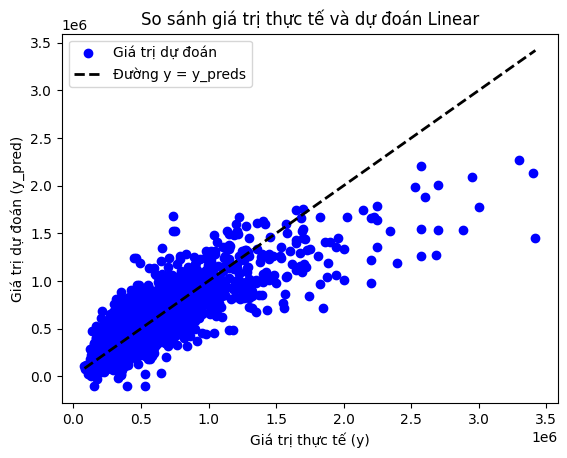

R-square: 0.65072719


In [56]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_preds = linear.predict(X_test)
# Vẽ biểu đồ phân tán giữa y thực tế và y dự đoán
plt.scatter(y_test, linear_preds, color='blue', label='Giá trị dự đoán')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Đường y = y_preds')

# Thêm tiêu đề và nhãn
plt.title("So sánh giá trị thực tế và dự đoán Linear")
plt.xlabel("Giá trị thực tế (y)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.legend()

# Hiển thị biểu đồ
plt.show()

# In kết quả R-square
print(f"R-square: {linear.score(X_train, y_train):.8f}")

In [57]:
# Dự đoán trên tập huấn luyện
train_predictions = linear.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

print("Đánh giá trên tập huấn luyện:")
print(f"Mean Squared Error: {train_mse}")
print(f"Mean Absolute Error: {train_mae}")
print(f"R² Score: {train_r2}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}\n")

# Dự đoán trên tập kiểm tra
test_predictions = linear.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Đánh giá trên tập xác thực:")
print(f"Mean Squared Error: {test_mse}")
print(f"Mean Absolute Error: {test_mae}")
print(f"R² Score: {test_r2}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")


Đánh giá trên tập huấn luyện:
Mean Squared Error: 49275012857.93825
Mean Absolute Error: 142341.68183456495
R² Score: 0.6507271915232631
Root Mean Squared Error (RMSE): 221979.75776619418

Đánh giá trên tập xác thực:
Mean Squared Error: 37776434094.19381
Mean Absolute Error: 134333.06198466648
R² Score: 0.664414704366242
Root Mean Squared Error (RMSE): 194361.6065332704


In [58]:
import time

# Đo thời gian huấn luyện
start_time = time.time()
linear.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Thời gian huấn luyện: {train_time:.4f} giây")

# Đo thời gian dự đoán trên tập kiểm tra
start_time = time.time()
test_predictions = linear.predict(X_test)
prediction_time = time.time() - start_time
print(f"Thời gian dự đoán: {prediction_time:.4f} giây")


Thời gian huấn luyện: 0.0953 giây
Thời gian dự đoán: 0.0056 giây


In [59]:
X_test_noisy = X_test + np.random.normal(0, 0.0000000000001, X_test.shape)

noisy_predictions = linear.predict(X_test_noisy)

noisy_mse = mean_squared_error(y_test, noisy_predictions)
noisy_mae = mean_absolute_error(y_test, noisy_predictions)
noisy_r2 = r2_score(y_test, noisy_predictions)

print("\nHiệu suất với dữ liệu có nhiễu:")
print(f"MSE với nhiễu: {noisy_mse:.2f}")
print(f"MAE với nhiễu: {noisy_mae:.2f}")
print(f"R-squared với nhiễu: {noisy_r2:.4f}")



Hiệu suất với dữ liệu có nhiễu:
MSE với nhiễu: 67228224412.35
MAE với nhiễu: 196715.40
R-squared với nhiễu: 0.4028


In [60]:
sample_size = [5000, 10000, 15000, 20000]
for size in sample_size:
    X_sample = X_train[:size]
    y_sample = y_train[:size]

    start_time = time.time()
    linear.fit(X_sample, y_sample)
    train_time = time.time() - start_time
    print(f"Thời gian huấn luyện với mẫu {size}: {train_time:.4f} giây")



Thời gian huấn luyện với mẫu 5000: 0.0685 giây
Thời gian huấn luyện với mẫu 10000: 0.0291 giây
Thời gian huấn luyện với mẫu 15000: 0.0253 giây
Thời gian huấn luyện với mẫu 20000: 0.0406 giây


In [61]:
num_params = len(linear.coef_) + 1  # +1 cho hệ số chặn (intercept)
print(f"Số lượng tham số trong mô hình: {num_params}")

print("Hệ số hồi quy (Weights):", linear.coef_)
print("Hệ số chặn (Intercept):", linear.intercept_)


Số lượng tham số trong mô hình: 16
Hệ số hồi quy (Weights): [-4.40822947e+04  5.06037419e+04  1.19780719e+18 -1.24292056e+03
  2.41818577e+04  5.67999844e+05  4.44590648e+04  1.87096691e+04
  1.21033006e+05 -1.07996099e+18 -5.77192756e+17  1.01224163e+04
 -1.53615836e+04 -1.07219980e+05  2.71459695e+03]
Hệ số chặn (Intercept): -458763.3009209529
